In [2]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
from matplotlib import pyplot as plt

import yfinance as yf

# Load stock info

In [3]:
# Download stock info
stock_info = yf.download("NVDA", start="2021-01-01", end="2021-08-16")
stock_info

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,130.862381,56064000
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.768829,32276000
2021-01-06,132.225006,132.449997,125.860001,126.144997,125.882767,58042400
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.162628,46148000
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.491486,29252800
...,...,...,...,...,...,...
2021-08-09,204.460007,205.080002,201.429993,202.949997,202.644455,14644300
2021-08-10,203.220001,204.300003,198.350006,199.360001,199.059845,17923800
2021-08-11,200.429993,200.490005,194.300003,196.990005,196.693405,18592500


In [4]:
# Load the stock close data
stock_close_data = pd.DataFrame(stock_info["Close"])
stock_close_data

,Close
Date,
2021-01-04,131.134995
2021-01-05,134.047501
2021-01-06,126.144997
2021-01-07,133.440002
2021-01-08,132.767502
...,...
2021-08-09,202.949997
2021-08-10,199.360001
2021-08-11,196.990005


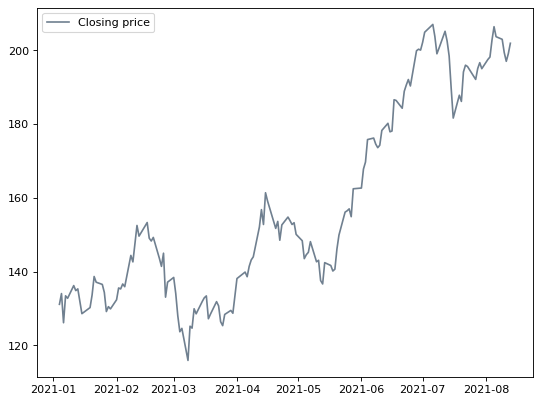

In [5]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.legend()
plt.show()

# Smooth data

In [6]:
stock_close_data = pd.DataFrame(stock_info["Close"])

# Smaller N -> More accurate
# Larger N -> More smooth
# Ref: https://books.google.com.hk/books?id=m2T9CQAAQBAJ&pg=PA189&lpg=PA189&dq=numpy+blackman+and+convolve&source=bl&ots=5lqrOE_YHL&sig=ACfU3U3onrK4g3uAo3a9FLT_3yMcQXGfKQ&hl=en&sa=X&ved=2ahUKEwjE8p-l-rbyAhVI05QKHfJnAL0Q6AF6BAgQEAM#v=onepage&q=numpy%20blackman%20and%20convolve&f=false
N = 10
window = np.blackman(N)
smoothed_data = np.convolve(window / window.sum(), stock_close_data["Close"], mode='same')
smoothed_data = pd.DataFrame(smoothed_data, index=stock_close_data.index, columns=["Smoothed Close"])

stock_close_data = stock_close_data[N: -N]
smoothed_data = smoothed_data[N: -N]

smoothed_data

,Smoothed Close
Date,
2021-01-19,131.769508
2021-01-20,132.977971
2021-01-21,134.768205
2021-01-22,135.958290
2021-01-25,135.811535
...,...
2021-07-26,194.140519
2021-07-27,194.011076
2021-07-28,194.284679


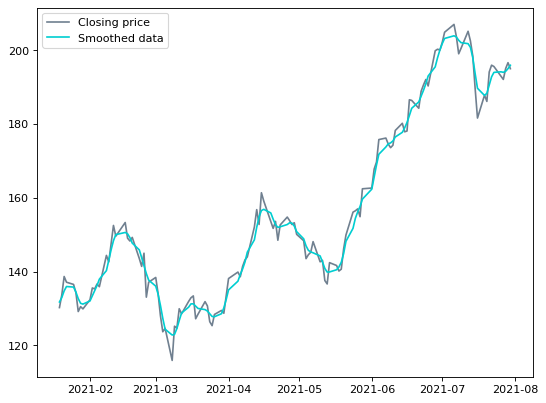

In [7]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.legend()
plt.show()

# Find approximate local maxima (peaks)

In [8]:
# Find local maxima
peak_indexs = argrelextrema(smoothed_data["Smoothed Close"].to_numpy(), np.greater)[0]

peaks = stock_close_data.iloc[peak_indexs]["Close"] #["Close"] means select column named "Close"
peaks = pd.DataFrame(peaks)
peaks

,Close
Date,
2021-01-22,137.125000
2021-02-16,153.302505
2021-03-17,133.412506
2021-04-16,159.125000
2021-04-27,153.817505
2021-07-06,206.985001
2021-07-26,192.940002


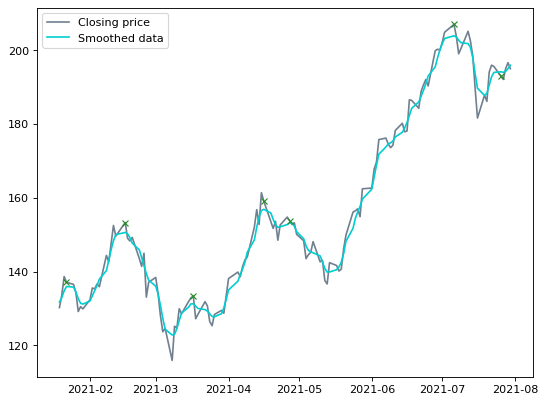

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.plot(peaks, "x", color="forestgreen")
plt.legend()
plt.show()

## method of finding approx. local extrama
1. find coor of local extrama of smoothed data by argrelextrema() from scipy.signal
2. find corresponding point on actual data according to x-value(index) of (1.)


# Find approximate local minima (bottoms)

In [10]:
# Find local minima
bottom_indexs = argrelextrema(smoothed_data["Smoothed Close"].to_numpy(), np.less)[0]
bottoms = stock_close_data.iloc[bottom_indexs]["Close"]
bottoms = pd.DataFrame(bottoms)
bottoms

,Close
Date,
2021-01-29,129.897507
2021-03-08,115.932503
2021-03-26,128.392502
2021-04-22,148.502502
2021-05-13,136.652496
2021-07-19,187.797501
2021-07-27,192.080002


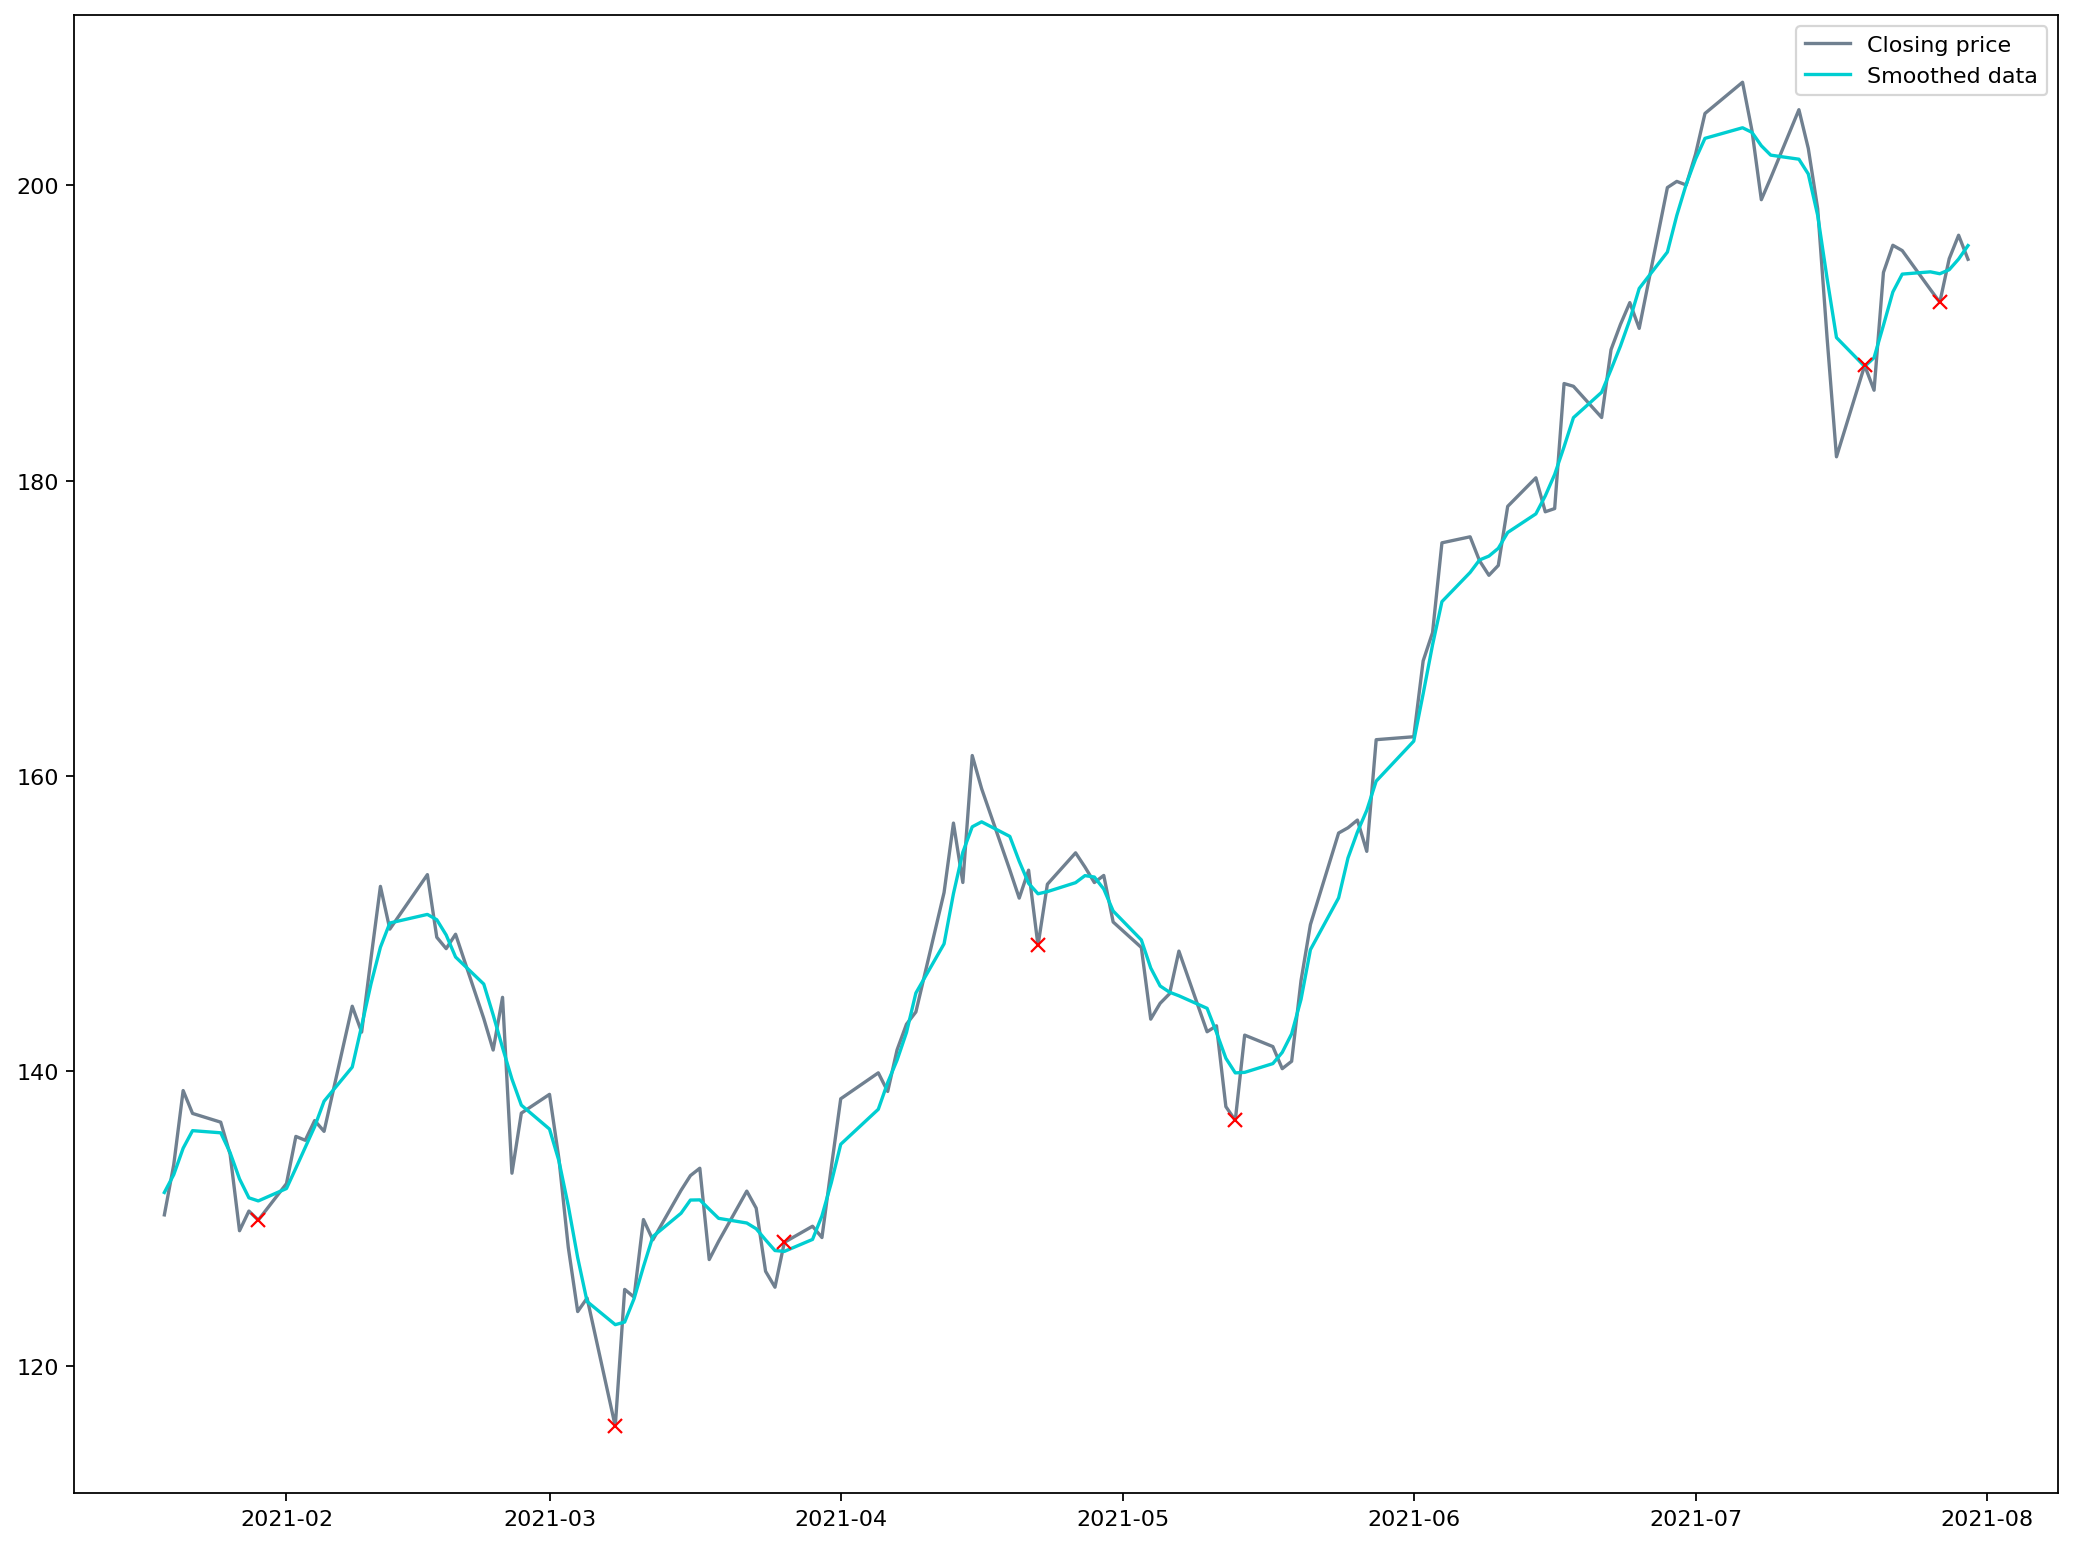

In [11]:
plt.figure(figsize=(16, 12), dpi=160)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.plot(bottoms, "x", color="red")
plt.legend()
plt.show()

# Find actual local maxima (peaks)

## method
this method to find local extrema is simply set intervals as extrema of smooth data +- **interval**

-> find min/max of y-vlaue within interval

for small interval -> close to actual local min/max 

for large interval -> yet to investigate the physical meaning

In [62]:
# Suggestion: For larger N, interval shuold be larger as well.
interval = 100

In [63]:
peak_dates = []
peak_close = []
for index in peak_indexs: #smoothed peak index
    lower_boundary = index - interval
    if lower_boundary < 0:
        lower_boundary = 0
    upper_boundary = index + interval + 1
    if upper_boundary > len(stock_close_data) - 1:
        upper_boundary = len(stock_close_data)
    stock_data_in_interval = stock_close_data.iloc[list(range(lower_boundary, upper_boundary))]
    peak_dates.append(stock_data_in_interval["Close"].idxmax())
    peak_close.append(stock_data_in_interval["Close"].max())
peaks = pd.DataFrame({"Close": peak_close}, index=peak_dates)
peaks.index.name = "Date"
peaks

,Close
Date,
2021-06-14,180.187500
2021-07-06,206.985001
2021-07-06,206.985001
2021-07-06,206.985001
2021-07-06,206.985001
2021-07-06,206.985001
2021-07-06,206.985001


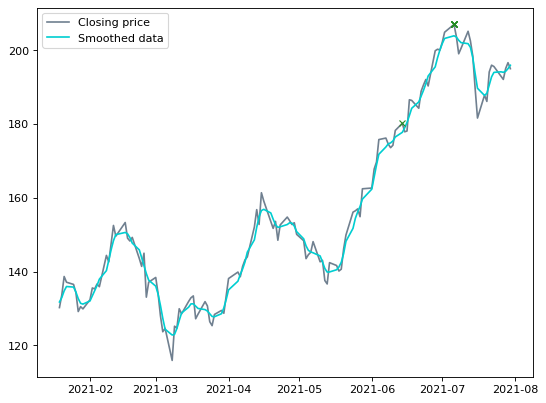

In [64]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.plot(peaks, "x", color="forestgreen")
plt.legend()
plt.show()

# Find actual local minima (bottoms)

In [61]:
bottom_dates = []
bottom_close = []
for index in bottom_indexs:
    lower_boundary = index - interval
    if lower_boundary < 0:
        lower_boundary = 0
    upper_boundary = index + interval + 1
    if upper_boundary > len(stock_close_data) - 1:
        upper_boundary = len(stock_close_data)
    stock_data_in_interval = stock_close_data.iloc[list(range(lower_boundary, upper_boundary))]
    bottom_dates.append(stock_data_in_interval["Close"].idxmin())
    bottom_close.append(stock_data_in_interval["Close"].min())
bottoms = pd.DataFrame({"Close": bottom_close}, index=bottom_dates)
bottoms.index.name = "Date"
bottoms

,Close
Date,
2021-01-29,129.897507
2021-03-08,115.932503
2021-03-25,125.352501
2021-04-22,148.502502
2021-05-13,136.652496
2021-07-16,181.610001
2021-07-27,192.080002


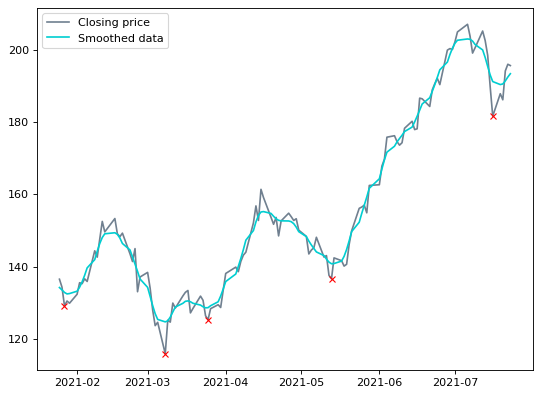

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.plot(bottoms, "x", color="red")
plt.legend()
plt.show()

# Final result

In [16]:
# Peaks
peaks

,Close
Date,
2021-02-16,153.302505
2021-03-17,133.412506
2021-04-15,161.372498
2021-07-06,206.985001


In [17]:
# Bottoms
bottoms

,Close
Date,
2021-01-27,129.177505
2021-03-08,115.932503
2021-03-25,125.352501
2021-05-13,136.652496
2021-07-16,181.610001


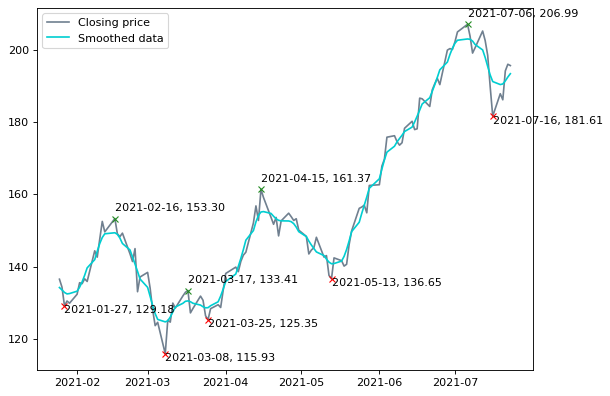

In [18]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(smoothed_data, label="Smoothed data", color="darkturquoise")
plt.plot(peaks, "x", color="forestgreen")
plt.plot(bottoms, "x", color="red")
for date, peak in zip(peaks.index, peaks["Close"]):
    plt.annotate(date.strftime("%Y-%m-%d") + ", {:.2f}".format(peak), (date, peak+2))
for date, bottom in zip(bottoms.index, bottoms["Close"]):
    plt.annotate(date.strftime("%Y-%m-%d") + ", {:.2f}".format(bottom), (date, bottom-2))
plt.legend()
plt.show()